# 7CCSONAR Research Skills: Analysis and Reporting



## Honeypot Attack Prediction: A Statistical Model Based on Country of Origin and Time of Day

#### Analysis prepared by Anna Shirokova


# RQ: Can we build a predictive model that accurately forecasts the frequency of attacks to honeypots based on the country of origin and time of day? 

In the context of this research question, the target variable would be the frequency of attacks on the honeypots based in London. This is the variable that we want to predict using the other variables (country of origin and time of day). The other variables are the predictors or independent variables.

We will create a new column in our dataset called "Attack_Frequency", and populate it with the frequency of attacks observed in a given time period (e.g., per hour or per day).

To predict the frequency of attacks, we will use linear regression. We would use the country of origin of the attacker, and the time of day features as predictors.

Before training a model, we would need to preprocess our data and extract the relevant features. For example,we need to extract the hour of the day from the "StartTime" column, get country code and name from geo information for IP address, and create dummy variables for each country of origin. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pathlib import Path
import datetime
import os
import glob

In [2]:
path_to_csv_folder = 'Honeypot-Cloud-DigitalOcean-Geo-4'

In [3]:
csv_files = glob.glob(path_to_csv_folder + '/*.csv')

In [4]:
csv_files

['Honeypot-Cloud-DigitalOcean-Geo-4/2021-04-29_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-05-04_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-05-06_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-04-30_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-04-24_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-04-26_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-05-02_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-04-28_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-05-05_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-DigitalOcean-Geo-4/2021-04-23_honeypot-cloud-digitalocean-geo-4_netflow-v5.csv',
 'Honeypot-Cloud-Dig

In [5]:
dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

df = pd.concat(dfs)

# High level data overview
    Initial data exploration to check for missing values, duplicates, and available columns 

In [6]:
df.shape

(130605, 15)

In [7]:
df.size

1959075

    Attribute	 Attribute Description
    
    StartTime	record start time
    Dur		total duration
    Proto		transaction protocol
    SrcAddr		source IP address
    Sport    	source port number
    Dir	      	direction of transaction
    DstAddr	   	destination IP address
    Dport	  	destination port number
    State	 	transaction state
    sTos	 	source TOS (type of service) byte value
    dTos	 	destination TOS (type of service) byte value
    TotPkts	 	total transaction packet count
    TotBytes	total transaction bytes
    SrcBytes	source to destination transaction bytes
    SrcPkts		source to destination packet count

In [8]:
df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts
0,2021/04/29 02:00:00.000000,1590.057495,arp,159.65.16.1,NaN,who,159.65.26.180,NaN,CON,NaN,NaN,4,206,121,2
1,2021/04/29 02:00:03.763696,0.000045,udp,109.248.203.193,36758,->,159.65.26.180,3702,INT,0.0,NaN,1,56,56,1
2,2021/04/29 02:00:14.147422,0.132838,tcp,109.234.153.131,54413,->,159.65.26.180,3128,SR_RA,0.0,0.0,3,166,112,2
3,2021/04/29 02:00:14.156015,0.121702,tcp,109.234.153.131,54413,->,159.65.26.180,8080,SR_RA,0.0,0.0,3,166,112,2
4,2021/04/29 02:00:15.457550,0.062870,tcp,109.234.153.131,54413,->,159.65.26.180,2174,SR_RA,0.0,0.0,3,166,112,2


In [9]:
df.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'SrcPkts'],
      dtype='object')

In [10]:
def basic_information_about_df(df):
        """
        Function: basic_information_about_df(df)

        This function prints the basic information about a given pandas DataFrame object. 
        The function prints the number of rows and columns, total number of NA values,
        and the column-wise data type, number of distinct values, and number of NA values.

        Inputs:
        - df: A pandas DataFrame object that needs to be analyzed

        Outputs:
        - Prints the basic information about the input dataframe
        """
        

        if isinstance(df, pd.DataFrame):
            total_na = df.isna().sum().sum()
            print("Dataset contains : %d rows, %d columns" % (df.shape[0], df.shape[1]))
            print("Total NA Values : %d " % (total_na))
            print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
            col_name = df.columns
            dtyp = df.dtypes
            uniq = df.nunique()
            na_val = df.isna().sum()
            for i in range(len(df.columns)):
                print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))

        else:
            print("Expect a DataFrame but got a %15s" % (type(df)))

In [11]:
basic_information_about_df(df)

Dataset contains : 130605 rows, 15 columns
Total NA Values : 9002 
                           Column Name  Data Type      #Distinct  NA Values
                             StartTime     object       130245          0
                                   Dur    float64        49246          0
                                 Proto     object            6          0
                               SrcAddr     object        26620          0
                                 Sport     object        35450        488
                                   Dir     object            6          0
                               DstAddr     object            2          0
                                 Dport     object        29877        488
                                 State     object           39          0
                                  sTos    float64           38        618
                                  dTos    float64           36       7408
                               TotPkts     

In [12]:
df.duplicated().sum()

0

* Observations


**Missing values**
    
The columns 'Sport' and 'Dport' have 488 missing values.<br>
The column 'sTos' has 618 missing values.<br>
The column 'dTos' has 7408 missing values.<br>

**No missing values**

In columns 'StartTime', 'Dur', 'Proto', 'SrcAddr', 'Dir', 'DstAddr', 'State', 'TotPkts', 'TotBytes', 'SrcBytes', and 'SrcPkts' <br>


**No duplicates**

0 duplicates found

**Variable types**

Our data has both quantitative and qualitative values

###  Examine categorical features in the dataset
 * We have **8** categorical variables
- 'StartTime', 
- 'Proto',
- 'SrcAddr',
- 'Sport',
- 'Dir',
- 'DstAddr',
- 'Dport',
- 'State'
- `Sport`, `Dport` are  port numbers which represented as integer values in network traffic data,but they are not treated as continuous variables in statistical analysis. <br>
Instead, they are typically treated as categorical variables.

In [13]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['StartTime', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr', 'Dport',
       'State'],
      dtype='object')

In [14]:
len(categorical_features.columns)

8

In [15]:
categorical_features.head(3)

,StartTime,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State
0,2021/04/29 02:00:00.000000,arp,159.65.16.1,NaN,who,159.65.26.180,NaN,CON
1,2021/04/29 02:00:03.763696,udp,109.248.203.193,36758,->,159.65.26.180,3702,INT
2,2021/04/29 02:00:14.147422,tcp,109.234.153.131,54413,->,159.65.26.180,3128,SR_RA


### Examine numerical features in the dataset

Dataset has 8 numerical features, out of which
- 3 discrete features

    TotPkts,
    SrcBytes,
    SrcPkts,
    
- 4 continuous
    Dur,
    sTos,
    dTos,
    TotBytes

In [16]:
numerical_features = df.select_dtypes(include=np.number)
numerical_features.columns

Index(['Dur', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes', 'SrcPkts'], dtype='object')

In [17]:
len(categorical_features.columns)

8

In [18]:
numerical_features.head(3)

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts
0,1590.057495,NaN,NaN,4,206,121,2
1,0.000045,0.0,NaN,1,56,56,1
2,0.132838,0.0,0.0,3,166,112,2


In [19]:
numerical_features.describe().round(2)

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts
count,130605.00,129987.00,123197.00,130605.00,130605.00,130605.00,130605.00
mean,9.89,3.81,3.62,2.60,156.75,96.64,1.53
std,143.08,16.45,15.32,1.16,88.39,59.21,0.68
min,0.00,0.00,0.00,1.00,56.00,0.00,0.00
25%,0.00,0.00,0.00,2.00,112.00,58.00,1.00
50%,0.01,0.00,0.00,3.00,166.00,112.00,2.00
75%,0.06,0.00,0.00,3.00,166.00,112.00,2.00
max,3527.25,228.00,228.00,208.00,11440.00,5824.00,104.00


#  Preprocessing and Data Cleanup

### Methodology

Data enrichment with geo information based on the source IP addresses of the attackers 

Splitting timestamp into more granular components for fine-grained analysis 

Dropping unnecessary columns and filtering out irrelevant data 

Removing all missing values in the dataset 


#### Data Enrichment
* We have total 130605 IPs, out of which 26620 are unique. These IPs are IPs of attackers attacking honeypot (DstAddr)

In [20]:
df['SrcAddr'].shape

(130605,)

In [21]:
unique_ips = df['SrcAddr'].drop_duplicates()

In [22]:
unique_ips.count()

26620

- Save unique IPs of attackers to csv for further preprocessing, such as getting country name and code for each unique IP

In [23]:
#unique_ips.to_csv("attackers_ip_unique")

- Read csv with IP, country, and country code

In [24]:
csv_file =  'merged_results_of_ips_geo.csv'

In [25]:
ips_to_country_df = pd.read_csv(csv_file)

In [26]:
ips_to_country_df.head(3)

,SrcAddr,Country,Country Code
0,62.15.101.186,Spain,ES
1,45.234.116.2,Argentina,AR
2,206.189.178.37,United States,US


* some are missing values in Country Code

In [27]:
ips_to_country_df.count()

SrcAddr         26645
Country         26645
Country Code    26641
dtype: int64

In [28]:
basic_information_about_df(ips_to_country_df)

Dataset contains : 26645 rows, 3 columns
Total NA Values : 4 
                           Column Name  Data Type      #Distinct  NA Values
                               SrcAddr     object        26620          0
                               Country     object          179          0
                          Country Code     object          179          4


* get the rows with missing values

In [29]:
na_rows = ips_to_country_df[ips_to_country_df.isna().any(axis=1)]

In [30]:
na_rows

,SrcAddr,Country,Country Code
8191,197.243.233.43,Namibia,NaN
12242,196.44.142.242,Namibia,NaN
21361,154.0.206.190,Namibia,NaN
26615,154.0.206.108,Namibia,NaN


* Country Code of Namibia is NA, so pandas treated it as missing values :) lets replace them to NAM

In [31]:
ips_to_country_df = ips_to_country_df.fillna('NAM')

In [32]:
ips_to_country_df[(ips_to_country_df['Country'] == 'Namibia') | (ips_to_country_df['Country Code'] == 'NAM')]

,SrcAddr,Country,Country Code
8191,197.243.233.43,Namibia,NAM
12242,196.44.142.242,Namibia,NAM
21361,154.0.206.190,Namibia,NAM
26615,154.0.206.108,Namibia,NAM


In [33]:
ips_to_country_df["Country Code"]

0        ES
1        AR
2        US
3        CN
4        MX
         ..
26640    IT
26641    TW
26642    TW
26643    CL
26644    US
Name: Country Code, Length: 26645, dtype: object

In [34]:
df.shape

(130605, 15)

* Merge 2 dataframes on SrcAddr

In [35]:
df = df.merge(ips_to_country_df[['SrcAddr', 'Country', 'Country Code']], on='SrcAddr', how='left')

In [36]:
df[['Country', 'Country Code']].isna().sum()

Country         1
Country Code    1
dtype: int64

* Check for missing values in Country and Country Code columns

In [37]:
df[(df['Country'].isna()) | (df['Country Code'].isna())]

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Country,Country Code
5181,2021/04/29 12:00:53.171291,0.000028,tcp,202.87.175.214,41796,->,159.65.26.180,692,S_RA,0.0,0.0,2,120,66,1,NaN,NaN


* Some IP was missing geolocation; Manually looked up IP address. IP located in Australia and country code is AUS
ref: https://www.geolocation.com/?ip=202.87.175.214#ipresult 
* Updating dataframe

In [38]:
ip_address = '202.87.175.214'
df.loc[df['SrcAddr'] == ip_address, 'Country'] = 'Australia'
df.loc[df['SrcAddr'] == ip_address, 'Country Code'] = 'AU'

In [39]:
df[(df['Country'].isna()) | (df['Country Code'].isna())]

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Country,Country Code


In [40]:
df.shape

(130605, 17)

In [41]:
df.head(3)

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Country,Country Code
0,2021/04/29 02:00:00.000000,1590.057495,arp,159.65.16.1,NaN,who,159.65.26.180,NaN,CON,NaN,NaN,4,206,121,2,United Kingdom,GB
1,2021/04/29 02:00:03.763696,0.000045,udp,109.248.203.193,36758,->,159.65.26.180,3702,INT,0.0,NaN,1,56,56,1,Russian Federation,RU
2,2021/04/29 02:00:14.147422,0.132838,tcp,109.234.153.131,54413,->,159.65.26.180,3128,SR_RA,0.0,0.0,3,166,112,2,Russian Federation,RU


#### Split timestamp column to : weekday, and hour.Add new columns to df

`StartTime format : 2021/04/29 02:00:00.000000`

In [42]:
df["StartTime"] = pd.to_datetime(df["StartTime"])
df["Weekday"] = df["StartTime"].dt.day_name() 
df["Hour"] = df["StartTime"].dt.hour

In [43]:
df.head(3)

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Country,Country Code,Weekday,Hour
0,2021-04-29 02:00:00.000000,1590.057495,arp,159.65.16.1,NaN,who,159.65.26.180,NaN,CON,NaN,NaN,4,206,121,2,United Kingdom,GB,Thursday,2
1,2021-04-29 02:00:03.763696,0.000045,udp,109.248.203.193,36758,->,159.65.26.180,3702,INT,0.0,NaN,1,56,56,1,Russian Federation,RU,Thursday,2
2,2021-04-29 02:00:14.147422,0.132838,tcp,109.234.153.131,54413,->,159.65.26.180,3128,SR_RA,0.0,0.0,3,166,112,2,Russian Federation,RU,Thursday,2


#### Dropping features that are not important  for predicting the frequency of attacks to honeypot:
In the context of our research question, the target variable would be the frequency of attacks on the honeypots based in London. This is the variable that we want to predict using the other variables (country of origin and time of day). The other variables are the predictors or independent variables. 

In [44]:
df.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'SrcPkts', 'Country', 'Country Code', 'Weekday', 'Hour'],
      dtype='object')

In [45]:
df["State"].value_counts()

S_RA         63419
SR_RA        52377
INT           6413
ECO           6255
SA_R           657
CON            486
SEC_RA         141
TXD            137
_              132
S_             102
URHPRO          94
URH             83
A_R             50
R_A             48
R_              47
SR_SA           31
SRA_RA          25
FSPA_FSPA       21
URP             17
RA_             11
URN             11
FSA_FSPA        11
SAE_R            6
URO              6
S_SA             6
FSRA_RA          2
SR_              2
URFIL            2
FSPA_SRPA        2
SRPA_RA          2
SRA_SA           1
FSRA_SPA         1
SRA_SRA          1
SAC_R            1
SRPA_FSPA        1
SREC_SAE         1
SA_              1
A_               1
SRC              1
Name: State, dtype: int64

`Dir`: The direction is not relevant since they honeypots are passive and  the attacks are always inbound <br>


In [46]:
df['Dir'].unique()

array(['  who', '   ->', '  <->', '   ?>', '  <?>', '  <?'], dtype=object)

`sTos`, `dTos`: these colums dont provide any useful information for our reserach problem

In [47]:
df[['sTos', 'dTos']]

,sTos,dTos
0,NaN,NaN
1,0.0,NaN
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
130600,0.0,0.0
130601,0.0,0.0
130602,0.0,0.0
130603,0.0,0.0


`Sport` and `Dport` columns as they represent the source and destination ports respectively,and wont be relevant for our analysis. 

In [48]:
df[['Sport', 'Dport']].head(5)

,Sport,Dport
0,NaN,NaN
1,36758,3702
2,54413,3128
3,54413,8080
4,54413,2174


Final list of columns to drop  that are not relevant or redundant for our analysis in the context of our RQ

In [49]:
columns_to_drop = ['Dir', 'sTos', 'dTos', 'Sport', 'Dport', 'State']

In [50]:
df[columns_to_drop].head(5)

,Dir,sTos,dTos,Sport,Dport,State
0,who,NaN,NaN,NaN,NaN,CON
1,->,0.0,NaN,36758,3702,INT
2,->,0.0,0.0,54413,3128,SR_RA
3,->,0.0,0.0,54413,8080,SR_RA
4,->,0.0,0.0,54413,2174,SR_RA


In [51]:
# before dropping the columns
df.shape 

(130605, 19)

In [52]:
df = df.drop(columns_to_drop, axis=1)

In [53]:
df.shape

(130605, 13)

In [54]:
# after dropping the columns
df.head()

,StartTime,Dur,Proto,SrcAddr,DstAddr,TotPkts,TotBytes,SrcBytes,SrcPkts,Country,Country Code,Weekday,Hour
0,2021-04-29 02:00:00.000000,1590.057495,arp,159.65.16.1,159.65.26.180,4,206,121,2,United Kingdom,GB,Thursday,2
1,2021-04-29 02:00:03.763696,0.000045,udp,109.248.203.193,159.65.26.180,1,56,56,1,Russian Federation,RU,Thursday,2
2,2021-04-29 02:00:14.147422,0.132838,tcp,109.234.153.131,159.65.26.180,3,166,112,2,Russian Federation,RU,Thursday,2
3,2021-04-29 02:00:14.156015,0.121702,tcp,109.234.153.131,159.65.26.180,3,166,112,2,Russian Federation,RU,Thursday,2
4,2021-04-29 02:00:15.457550,0.062870,tcp,109.234.153.131,159.65.26.180,3,166,112,2,Russian Federation,RU,Thursday,2


#### Filter out arp traffic
`ARP` data could be excluded from the further analysis

In [55]:
filtered_df = df[df['Proto'] != "arp"]
filtered_df.shape[0]

130119

In [56]:
df = df[df['Proto'] != "arp"]

In [57]:
df[df['Proto'] == "arp"]

,StartTime,Dur,Proto,SrcAddr,DstAddr,TotPkts,TotBytes,SrcBytes,SrcPkts,Country,Country Code,Weekday,Hour


#### Check and Remove NaN values

In [58]:
df.isnull().values.any()

False

In [59]:
df = df.dropna()

# EDA ( Exploratory Data Analysis )  

### Methodology

Analysis performed using the following methods:

#### Univariate Analysis: 

Descriptive statistics and data visualization used for categorical data analysis 

Counting the frequency of unique values in each categorical variable to understand distribution and prevalence 

Visualizations using bar charts and histograms

Range of statistical measures used for numerical data analysis 

Mean and median employed to gain insight into the shape of the distribution 

Skewness of the distribution calculated 

Histograms with logarithmic scaling used to visualize distribution of data points 

#### Bivariate Analysis: 

Relationships between variables explored 

Pearson's correlation coefficient used to examine the correlation between pairs of variables 

Scatterplots and heatmaps used to visualize the results

#### Univariate analysis of categorical variables

In [60]:
df.dtypes

StartTime       datetime64[ns]
Dur                    float64
Proto                   object
SrcAddr                 object
DstAddr                 object
TotPkts                  int64
TotBytes                 int64
SrcBytes                 int64
SrcPkts                  int64
Country                 object
Country Code            object
Weekday                 object
Hour                     int64
dtype: object

**Objectives of these exploration**<br>
The mode is a measure of central tendency in statistics that refers to the most frequently occurring value in a dataset. In the context of categorical features, the mode represents the most common value or category in a feature. The mode can help us to answer these questions:

- We want to know which countries are most frequently attacking honeypots, the mode of the `Country` or `Country Code` columns can give us a starting point.

- We are also interested in understanding the most common attack protocols used in your honeypots, the mode of the `Proto` column can give us a quick insight into this.

- Finally, we want to know which weekdays or hours are most frequently targeted by attackers, the mode of the `Weekday` and `Hour` columns respectively gives us a quick insight.<br>


In [61]:
categorical_features_df = df.select_dtypes(include=[object])

In [62]:
combined_df = pd.concat([categorical_features_df, df["Hour"]], axis=1)

**Results**

In our case, the mode is United States with the country code "US", indicating that most attacks originate from the US.<br>
The mode  "tcp", indicating that TCP is the most common protocol used in attacks.<br>
And the mode of the "Weekday" column is "Friday" and the mode of the "Hour" column is "4", indicating that attacks are most frequently happening on Fridays and during the 4 AM

In [63]:
for col in combined_df:
    print(col.upper())
    print(combined_df[col].mode().to_string(index=False))
    print('-' * 50)

PROTO
tcp
--------------------------------------------------
SRCADDR
45.143.200.34
--------------------------------------------------
DSTADDR
159.65.26.180
--------------------------------------------------
COUNTRY
United States
--------------------------------------------------
COUNTRY CODE
US
--------------------------------------------------
WEEKDAY
Friday
--------------------------------------------------
HOUR
4
--------------------------------------------------


### What are the distribution and percentages of attacks across different hours of the day?

In [64]:
hour_counts = df['Hour'].value_counts()

In [65]:
hour_counts

4     6372
9     6183
0     5802
14    5793
15    5703
18    5552
13    5502
1     5463
16    5435
19    5397
22    5388
21    5323
12    5315
2     5311
6     5296
20    5270
10    5254
3     5193
23    5193
5     5190
17    5123
11    5104
7     5052
8     4905
Name: Hour, dtype: int64

In [66]:
hour_counts.sort_values(ascending=False)

4     6372
9     6183
0     5802
14    5793
15    5703
18    5552
13    5502
1     5463
16    5435
19    5397
22    5388
21    5323
12    5315
2     5311
6     5296
20    5270
10    5254
3     5193
23    5193
5     5190
17    5123
11    5104
7     5052
8     4905
Name: Hour, dtype: int64

In [67]:
hour_percentages = df['Hour'].value_counts(normalize=True)
hour_percentages.sort_values(ascending=False)

4     0.048971
9     0.047518
0     0.044590
14    0.044521
15    0.043829
18    0.042669
13    0.042284
1     0.041985
16    0.041769
19    0.041477
22    0.041408
21    0.040909
12    0.040847
2     0.040816
6     0.040701
20    0.040501
10    0.040378
3     0.039910
23    0.039910
5     0.039887
17    0.039372
11    0.039226
7     0.038826
8     0.037696
Name: Hour, dtype: float64

Based on the sorted frequency count of attacks by hour, we can see that the majority of attacks occurred between 12 am and 7 am, with the highest number of attacks occurring at 4 am and 9 am. On the other hand, the lowest number of attacks occurs during between 7AM and 8 AM, indicating that attackers are less active during the morning rush hour. 

However, it is important to note that this analysis only takes into account the time of the day and does not consider other factors that might influence the frequency of attacks. Factors that could potentially affect the frequency of attacks on honeypots based in London could include the country of attack origin of the , the time of day, the day of the week;

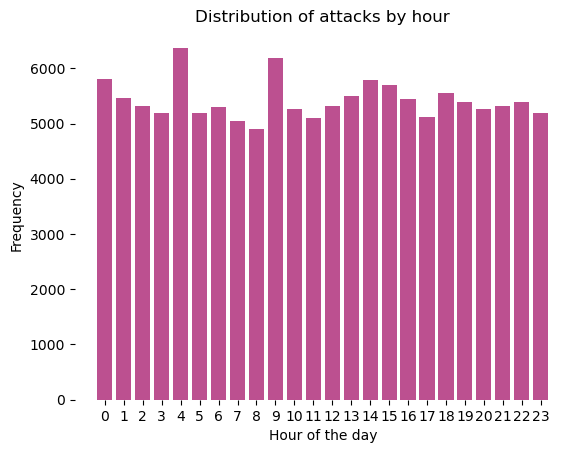

In [68]:
plt.bar(hour_counts.index, hour_counts.values, color="#bc5090")

plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Distribution of attacks by hour')
plt.xticks(range(0, 24))


for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()
#plt.savefig('distribution of attacks per hour.png', dpi=300,transparent=True)

### From which countries top 10 attackers came?
We need to understand the distribution of attacks based on the country of origin

In [69]:
attacker_countries = df['Country Code'].value_counts()

* We have 179 unique countries, for the sake of visualisation we will take only top 10

In [70]:
attacker_countries.count()

179

In [71]:
top_10_countries = attacker_countries.nlargest(10)

In [72]:
top_10_countries

US    25951
RU    24884
BG    13109
CN    12050
NL     7348
VN     7196
UA     3473
IN     3077
BR     2960
DE     2365
Name: Country Code, dtype: int64

In [73]:
top_attacker_countries_df = pd.DataFrame(list(zip(top_10_countries.index, top_10_countries.values)), columns=['Country', 'Count'])

In [74]:
top_attacker_countries_df

,Country,Count
0,US,25951
1,RU,24884
2,BG,13109
3,CN,12050
4,NL,7348
5,VN,7196
6,UA,3473
7,IN,3077
8,BR,2960
9,DE,2365


* Calculate the percentage of attacks by each country 

In [75]:
top_attacker_countries_df = top_attacker_countries_df.groupby("Country", as_index=False)["Count"].sum()
top_attacker_countries_df = top_attacker_countries_df.sort_values('Count', ascending=False)
top_attacker_countries_df['Percentage'] = (top_attacker_countries_df['Count'] / top_attacker_countries_df['Count'].sum()) * 100
x = top_attacker_countries_df["Country"]
y = top_attacker_countries_df["Percentage"]

Text(0.5, 1.0, 'Relative distribution of attacks among the top 10 attacker countries')

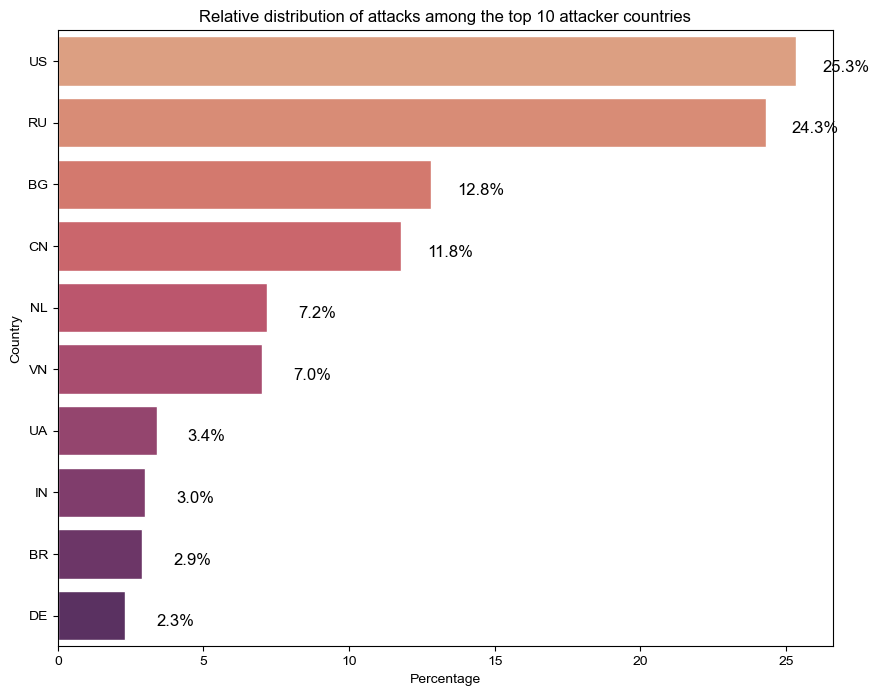

In [76]:
fig, ax = plt.subplots(1, figsize=(10,8))

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("flare", len(x))
rank = y.argsort().argsort() 

sns.barplot(x=y, y=x, palette=np.array(pal[::-1])[rank], ax=ax)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_width()), (p.get_width()+1, p.get_y()+0.5),
                ha='center', va='center',
                xytext=(15, 0), textcoords='offset points',
                color='black', fontsize=12)

ax.set_xlabel('Percentage')
ax.set_ylabel('Country')

plt.title('Relative distribution of attacks among the top 10 attacker countries')
#plt.savefig('relative_distribution_attacks_top_10_countries.png',  dpi=300, transparent=True)

Based on the visualisation the most attackers are coming from 
- 1st : US ( United States ) : 25%
- 2nd:  RU ( Russia ) : 24%
- 3d: BG ( Bulgaria ) : ~13%

In [77]:
top_attackers_packets_sent = df.groupby('Country Code')['TotPkts'].sum().sort_values(ascending=False)[:10]

In [78]:
top_attackers_packets_sent

Country Code
RU    73894
US    52687
BG    39052
CN    28840
NL    18227
VN    17177
UA    10188
IN     9026
BR     8481
TR     6676
Name: TotPkts, dtype: int64

The highest number of packets was sent by

- Russian Federation  sent  73894 packets
- United States   sent  52687 packets
- Bulgaria  sent  39052 packets

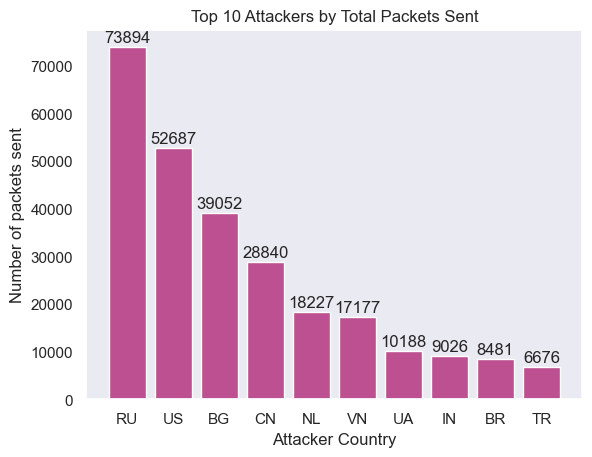

In [79]:
plt.bar(top_attackers_packets_sent.index, top_attackers_packets_sent.values, color='#bc5090')
plt.xlabel('Attacker Country')
# plt.xticks(rotation = 35)
plt.ylabel('Number of packets sent')
plt.title('Top 10 Attackers by Total Packets Sent')

for i, v in enumerate(top_attackers_packets_sent.values):
    plt.text(i, v+1000, str(v), ha='center')


plt.show()
# plt.savefig('top_10_attackers_by_total_packets.png',  dpi=300, transparent=True)

### What day of the week attackers attack the most?

In [80]:
attacks_by_weekday = df.groupby('Weekday')['TotPkts'].count()

In [81]:
attacks_by_weekday.sort_values(ascending=False)

Weekday
Friday       26610
Thursday     23648
Wednesday    19237
Saturday     16728
Monday       15368
Tuesday      15053
Sunday       13475
Name: TotPkts, dtype: int64

The highest number of attacks occurred on Friday. Thursday had the second-highest number of attacks, followed by Wednesday , and Saturday,Sunday had the lowest number of attacks.

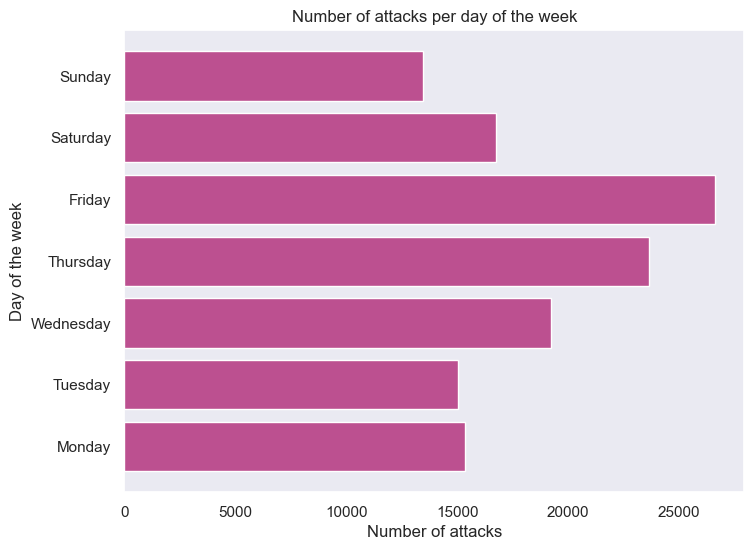

In [82]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
attacks_by_weekday_sorted = attacks_by_weekday.reindex(weekday_order)


fig, ax = plt.subplots(figsize=(8,6))
ax.barh(attacks_by_weekday_sorted.index, attacks_by_weekday_sorted.values, color='#bc5090')
ax.set_xlabel('Number of attacks')
ax.set_ylabel('Day of the week')
ax.set_title('Number of attacks per day of the week')

plt.show()
#plt.savefig('n_of_attacks_per_day_of_the_week.png', dpi=300, transparent=True)

### Which country has spent the highest overall duration of time attacking honeypots?

In [83]:
df_top10_country_by_dur = df.groupby(by='Country Code')['Dur'].sum().sort_values(ascending=False)[:10]

In [84]:
df_top10_country_by_dur

Country Code
US    128884.555636
CN     66658.094638
SE     48273.873330
JP     31943.065765
CA     23166.023826
ZA     22860.997157
BR     20228.501871
DE     18411.925316
PL     13640.396696
ES     12178.865614
Name: Dur, dtype: float64

* Duration was measured in microseconds 

In [85]:
average_duration = df['Dur'].mean()

In [86]:

average_duration

3.4666712678932363

* Average attack duration: 3.4666712678932363microseconds =  0.000003 seconds
* The country responsible for the longest attack is the United States (US), with a total duration of 128.885 seconds
    - US: 128,884.555636 microseconds = 128.885 seconds (rounded to 3 decimal places)
* China (CN) had the second-longest attack with a duration of 66.658 seconds
    - CN: 66,658.094638 microseconds = 66.658 seconds (rounded to 3 decimal places)
* followed by Sweden (SE) with a duration of 48.274 seconds
    - SE: 48,273.873330 microseconds = 48.274 seconds (rounded to 3 decimal places)

* Calculate how many times the United States' attack duration was longer than the average duration

In [87]:
us_attack_dur_in_sec = 128.885 
average_duration_in_sec =  0.000003 
us_attack_dur_in_sec / average_duration_in_sec

42961666.666666664

### What are the most common protocols used in the honeypot data?

The most common protocol is `TCP,` which appears 117100 times. <br>
The second and third most common protocols are `ICMP` and `UDP`, which appear 6606 and 6410 times respectively. <br>
The very low frequency of `SCTP`, and `UDT` protocols suggests that they are not commonly used. <br>

In [88]:
proto_freq = df['Proto'].value_counts()
proto_df = pd.DataFrame({'Protocol': proto_freq.index, 'Frequency': proto_freq.values})
proto_df

,Protocol,Frequency
0,tcp,117100
1,icmp,6606
2,udp,6410
3,sctp,2
4,udt,1


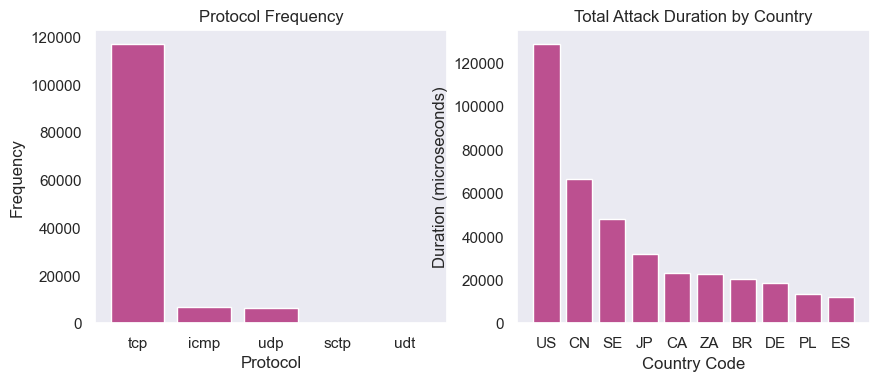

In [89]:
plt.figure(figsize=(10, 8))

# Plot 1 most common proto
plt.subplot(2, 2, 1)
plt.bar(proto_df['Protocol'], proto_df['Frequency'], color="#bc5090")
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.title('Protocol Frequency')

# Plot 2 top10_country_by_duration
plt.subplot(2, 2, 2)
plt.bar(df_top10_country_by_dur.index, df_top10_country_by_dur.values, color='#bc5090')
plt.title('Total Attack Duration by Country')
plt.xlabel('Country Code')
plt.xticks(rotation=0)
plt.ylabel('Duration (microseconds)')
plt.subplots_adjust(hspace=0.1)

plt.show()
#plt.savefig('protocol_freq_and_attack_duration_by_country.png', dpi=300, transparent=True)

### Univariate analysis of numerical variables

In [90]:
df.dtypes

StartTime       datetime64[ns]
Dur                    float64
Proto                   object
SrcAddr                 object
DstAddr                 object
TotPkts                  int64
TotBytes                 int64
SrcBytes                 int64
SrcPkts                  int64
Country                 object
Country Code            object
Weekday                 object
Hour                     int64
dtype: object

In [91]:
numerical_features = ["Dur", "TotPkts", "TotBytes", "SrcBytes", "SrcPkts"]

In [92]:
summary_stats = df[numerical_features].describe()

In [93]:
summary_stats

,Dur,TotPkts,TotBytes,SrcBytes,SrcPkts
count,130119.000000,130119.000000,130119.000000,130119.000000,130119.000000
mean,3.466671,2.597153,156.769303,96.666605,1.528078
std,66.638987,1.160274,88.498191,59.291582,0.678906
min,0.000000,1.000000,56.000000,0.000000,0.000000
25%,0.000028,2.000000,112.000000,58.000000,1.000000
50%,0.009910,3.000000,166.000000,112.000000,2.000000
75%,0.057926,3.000000,166.000000,112.000000,2.000000
max,3527.245117,208.000000,11440.000000,5824.000000,104.000000


Comparing the median values of the variables, we can see that "Dur" has a much smaller median than the other variables. This indicates that the distribution of "Dur" is likely skewed, with some network flows having a much longer duration than others. 

"TotPkts" and "SrcPkts" have a median value of 3 and 2 respectively, which means that half of the network flows have three or fewer packets and half have more than three for "TotPkts", while for "SrcPkts", half of the network flows have two or fewer packets and half have more than two. This indicates that the number of packets in a network flow varies widely, with some flows having very few packets and others having many. 

"TotBytes" and "SrcBytes" have similar median values of 166 and 112 respectively. This indicates that, on average, the total and source bytes transmitted in a network flow are similar across flows. 

In [94]:
mean = summary_stats.loc['mean']
median = summary_stats.loc['50%']
q1 = summary_stats.loc['25%']
q3 = summary_stats.loc['75%']

print("Mean:\n", mean)
print("Median:\n", median)
print("Interquartile Range (IQR):\n", q3 - q1)

Mean:
 Dur           3.466671
TotPkts       2.597153
TotBytes    156.769303
SrcBytes     96.666605
SrcPkts       1.528078
Name: mean, dtype: float64
Median:
 Dur           0.00991
TotPkts       3.00000
TotBytes    166.00000
SrcBytes    112.00000
SrcPkts       2.00000
Name: 50%, dtype: float64
Interquartile Range (IQR):
 Dur          0.057898
TotPkts      1.000000
TotBytes    54.000000
SrcBytes    54.000000
SrcPkts      1.000000
dtype: float64


* Skew or skewness measures the asymmetry of a distribution around its mean.
A negative skew indicates that the distribution has a longer tail on its left side, while a positive skew indicates a longer tail on its right side. Symmetric distributions have a skew of 0. 

Our data is positevly skewed with long tail on its rigth side.

In [95]:
df[numerical_features].skew()

Dur         29.480135
TotPkts     51.151379
TotBytes    31.664167
SrcBytes    15.109679
SrcPkts     32.445302
dtype: float64

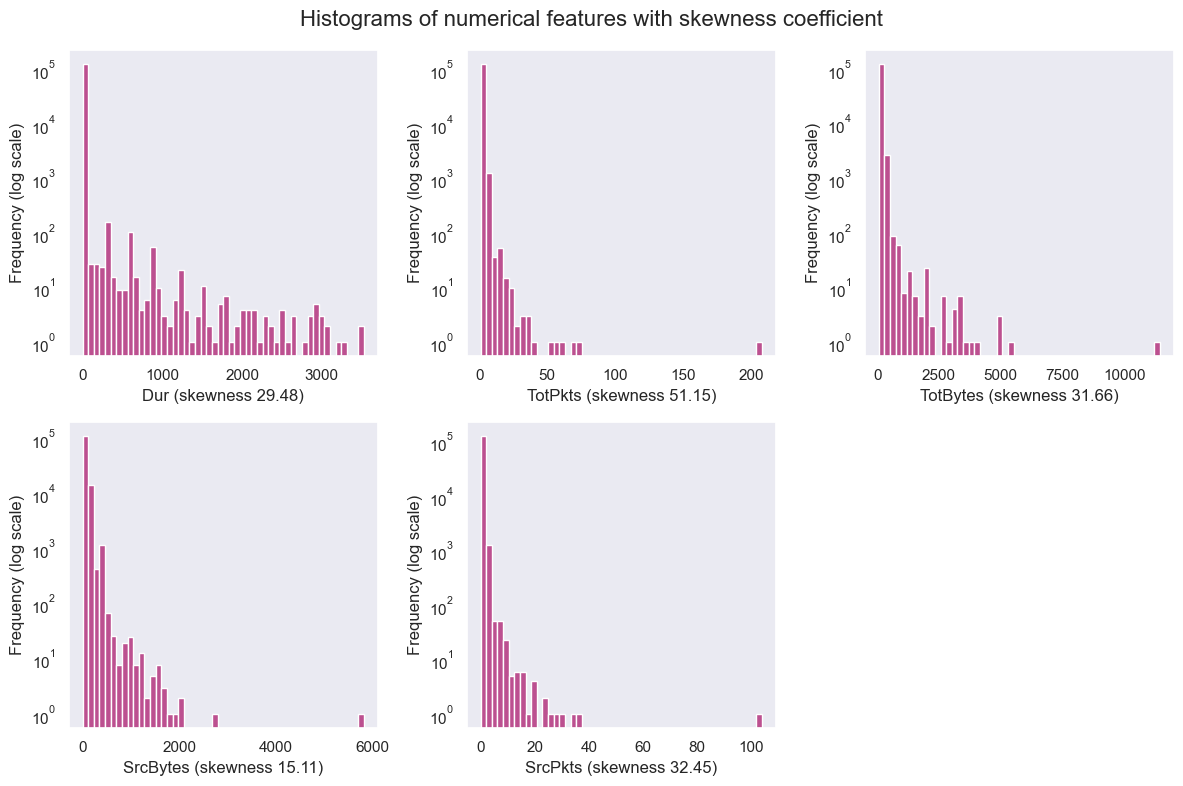

In [96]:
nrows = 2
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
fig.suptitle("Histograms of numerical features with skewness coefficient", fontsize=16)

for i, feature in enumerate(numerical_features):
    row = i // ncols
    col = i % ncols
    skewness = round((df[feature].skew()), 2)
    ax = axs[row, col]
    if not df[feature].empty:
        ax.hist(df[feature], bins=50, color='#bc5090', log=True)
        ax.set_xlabel(feature + f" (skewness {skewness})")
        ax.set_ylabel("Frequency (log scale)")

if i < nrows * ncols - 1:
    for j in range(i + 1, nrows * ncols):
        row = j // ncols
        col = j % ncols
        fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()
#plt.savefig('hists_of_numerical_feat_and_skew.png', dpi=300, transparent=True)

Comparing the median values of the variables, we can see that "Dur" has a much smaller median than the other variables. This indicates that the distribution of "Dur" is likely skewed, with some network flows having a much longer duration than others.

"TotPkts" and "SrcPkts" have a median value of 3 and 2 respectively, which means that half of the network flows have three or fewer packets and half have more than three for "TotPkts", while for "SrcPkts", half of the network flows have two or fewer packets and half have more than two. This indicates that the number of packets in a network flow varies widely, with some flows having very few packets and others having many.

"TotBytes" and "SrcBytes" have similar median values of 166 and 112 respectively. This indicates that, on average, the total and source bytes transmitted in a network flow are similar across flows.

# Bivariate analysis: exploring relationships

### Correlation Coefficients

In [97]:
corr_cols = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes', 'SrcPkts']

In [98]:
correlation = df[corr_cols].corr()

The table below shows the Pearson correlation coefficients between the duration of attack, the total number of packets, the total number of bytes, the number of source bytes, and the number of source packets. The correlation coefficient ranges from -1 to 1, where -1 represents a perfect negative correlation, 0 represents no correlation, and 1 represents a perfect positive correlation.

The table suggests that there is not strong correlation between the duration of attack and the other variables. The highest correlation coefficient is between the total number of packets and the number of source packets, which is 0.923. The correlation between the total number of packets and the total number of bytes is also relatively strong, with a correlation coefficient of 0.715. The correlation between the total number of bytes and the number of source bytes is even stronger, with a correlation coefficient of 0.897.
The reason why there is a strong correlation between these variables could be because they are all related to the size and amount of data being transmitted in the network traffic.

In [99]:
correlation

,Dur,TotPkts,TotBytes,SrcBytes,SrcPkts
Dur,1.000000,0.220415,0.208951,0.182856,0.205740
TotPkts,0.220415,1.000000,0.714742,0.530762,0.923496
TotBytes,0.208951,0.714742,1.000000,0.896703,0.667384
SrcBytes,0.182856,0.530762,0.896703,1.000000,0.604390
SrcPkts,0.205740,0.923496,0.667384,0.604390,1.000000


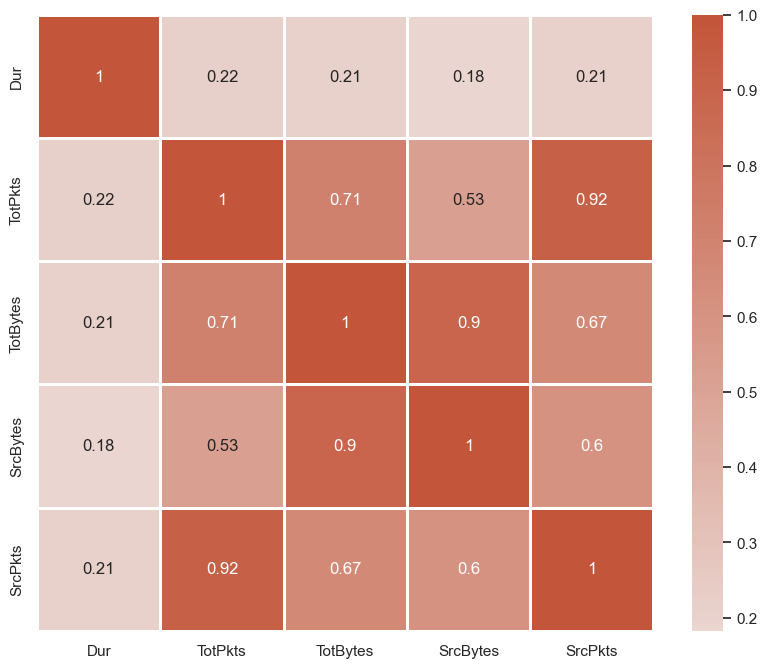

In [100]:
sns.set_theme('notebook')
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap=cmap, center=0, square=True, linewidths=1.)
#plt.savefig('correlation_heatmap.png', dpi=300, transparent=True)
plt.show()

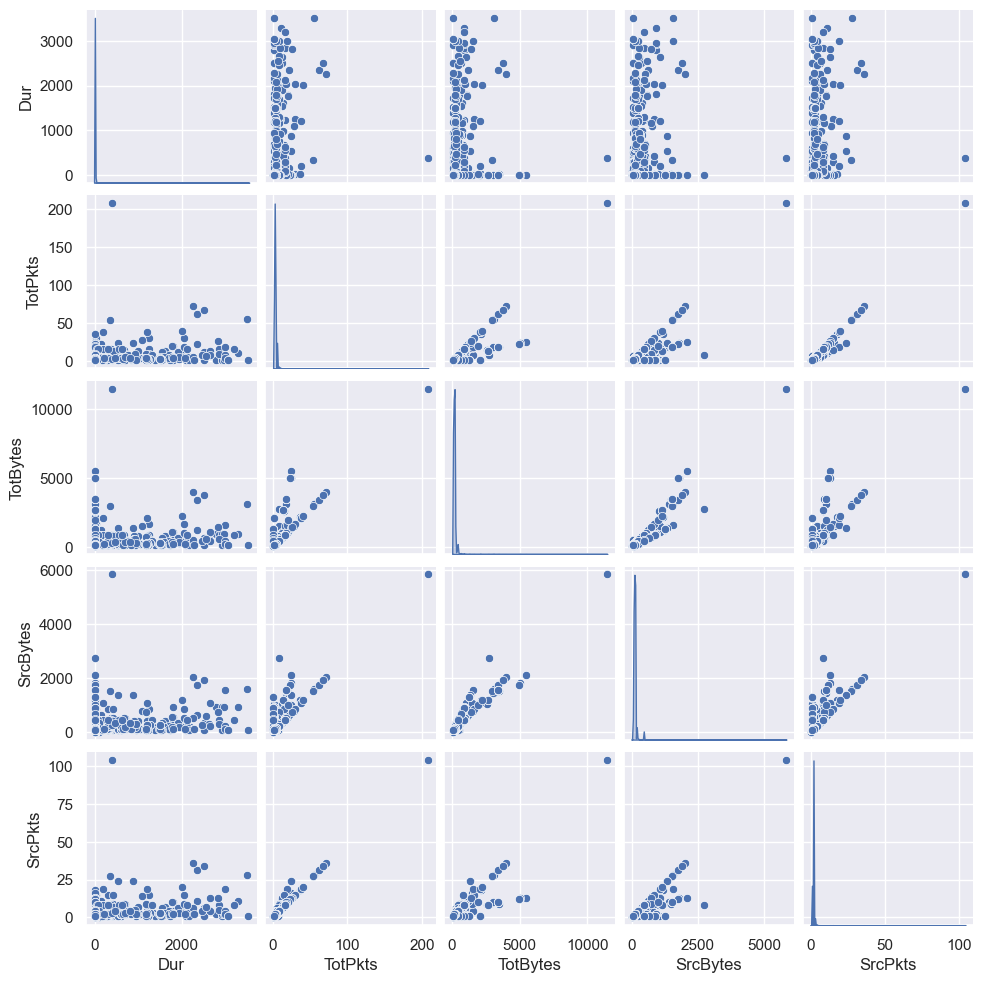

In [101]:
sns.set()
columns = ["Dur","TotPkts", "TotBytes", "SrcBytes", "SrcPkts"]
sns.pairplot(df[columns],height = 2 ,kind ='scatter',diag_kind='kde')
# plt.savefig('scatter_plot_visualisation_of_relationships_between_variables.png', dpi=300, transparent=True)

# Regression model

#### How many unique country we have in dataset?

We have 179 unique contries attacking our honeypot. It is quite a lot for cattegorical variable;

In [102]:
unique_codes = df['Country Code'].unique()
print(f"There are {len(unique_codes)} unique country codes in the dataframe")


There are 179 unique country codes in the dataframe


### How many percent of attacks are coming from top 10 contries?

So our calculation suggest 79% of attacks are coming from top 10 countries. So we can focus of them only

In [103]:
top_10_codes = top_10_countries.index.tolist()

# Filter the dataframe to exclude rows for the top 10 countries
other_countries_df = df[~df['Country Code'].isin(top_10_codes)]
other_count = len(other_countries_df)

print(f"There are {other_count} rows in the dataframe that are not in the top 10 countries.")


There are 27706 rows in the dataframe that are not in the top 10 countries.


In [104]:
percentage = (other_count / len(df)) * 100

print(f"{percentage:.2f}% of the rows in the dataframe are not in the top 10")

21.29% of the rows in the dataframe are not in the top 10


In [105]:
df_top_10_only = df[df['Country Code'].isin(top_10_codes)]

In [106]:
df_top_10_only.shape, other_countries_df.shape, df.shape

((102413, 13), (27706, 13), (130119, 13))

In [107]:
df_top_10_only.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'DstAddr', 'TotPkts',
       'TotBytes', 'SrcBytes', 'SrcPkts', 'Country', 'Country Code', 'Weekday',
       'Hour'],
      dtype='object')

In [108]:
df_top_10_only.shape

(102413, 13)

*  drop irrelevant and highly corelated features  features
    "StartTime", "SrcAddr","DstAddr","Country",  'SrcBytes', 'SrcPkts'

In [109]:
drop_irrelevant_features = ["StartTime", "SrcAddr","DstAddr","Country", 'SrcBytes', 'SrcPkts']

In [110]:
df_agg = df_top_10_only.drop(drop_irrelevant_features, axis=1)

In [111]:
df_agg

,Dur,Proto,TotPkts,TotBytes,Country Code,Weekday,Hour
1,0.000045,udp,1,56,RU,Thursday,2
2,0.132838,tcp,3,166,RU,Thursday,2
3,0.121702,tcp,3,166,RU,Thursday,2
4,0.062870,tcp,3,166,RU,Thursday,2
5,0.000028,tcp,2,120,CN,Thursday,2
...,...,...,...,...,...,...,...
130600,0.000029,tcp,2,110,DE,Wednesday,1
130601,0.063831,tcp,3,166,BG,Wednesday,1
130602,0.043038,tcp,3,166,BG,Wednesday,1
130603,0.060210,tcp,3,166,BG,Wednesday,1


#### One-Hot Encoding: Getting dummies for non-numerical variables

In [112]:
non_numeric_cols = df_agg.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

In [113]:
non_numeric_cols

['Proto', 'Country Code', 'Weekday']

In [114]:
for col in non_numeric_cols:
    dummies = pd.get_dummies(df_agg[col], prefix=col)
    df_agg = pd.concat([df_agg, dummies], axis=1)

In [115]:
df_agg = df_agg.drop(non_numeric_cols, axis=1)

In [116]:
df_agg.columns

Index(['Dur', 'TotPkts', 'TotBytes', 'Hour', 'Proto_icmp', 'Proto_sctp',
       'Proto_tcp', 'Proto_udp', 'Country Code_BG', 'Country Code_BR',
       'Country Code_CN', 'Country Code_DE', 'Country Code_IN',
       'Country Code_NL', 'Country Code_RU', 'Country Code_UA',
       'Country Code_US', 'Country Code_VN', 'Weekday_Friday',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [117]:
df_agg.head(3)

,Dur,TotPkts,TotBytes,Hour,Proto_icmp,Proto_sctp,Proto_tcp,Proto_udp,Country Code_BG,Country Code_BR,...,Country Code_UA,Country Code_US,Country Code_VN,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
1,0.000045,1,56,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.132838,3,166,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.121702,3,166,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [118]:
df_agg.columns

Index(['Dur', 'TotPkts', 'TotBytes', 'Hour', 'Proto_icmp', 'Proto_sctp',
       'Proto_tcp', 'Proto_udp', 'Country Code_BG', 'Country Code_BR',
       'Country Code_CN', 'Country Code_DE', 'Country Code_IN',
       'Country Code_NL', 'Country Code_RU', 'Country Code_UA',
       'Country Code_US', 'Country Code_VN', 'Weekday_Friday',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [119]:
# at country X at what time Y how many attacks happened?
# we have to get an aggr on country and time
grouped = df_agg.groupby(['Country Code_BG', 'Country Code_BR', 'Country Code_CN', 'Country Code_DE',
                      'Country Code_IN', 'Country Code_NL', 'Country Code_RU', 'Country Code_UA',
                      'Country Code_US', 'Country Code_VN', 'Hour']).mean()

In [120]:
grouped.head()

Dur  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour             
0               0               0               0               0               0               0               0               0               1               0     1.995248   
                                                                                                                                                                1     2.867968   
                                                                                                                                                                2     0.546525   
                                                                                                                                                                3     0.396108   
                                                                                                                                                                4     0.498405   

                                                                                                                                                                       TotPkts  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour             
0               0               0               0               0               0               0               0               0               1               0     2.389034   
                                                                                                                                                                1     2.258462   
                                                                                                                                                                2     2.382470   
                                                                                                                                                                3     2.661871   
                                                                                                                                                                4     2.563177   

                                                                                                                                                                        TotBytes  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour               
0               0               0               0               0               0               0               0               0               1               0     132.934726   
                                                                                                                                                                1     125.766154   
                                                                                                                                                                2     134.270916   
                                                                                                                                                                3     152.924460   
                                                                                                                                                                4     146.498195   

                                                                                                                                                                      Proto_icmp  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour               
0               0               0               0       

In [121]:
grouped["Attack_Frequency"] = df_agg.groupby(['Country Code_BG', 'Country Code_BR', 'Country Code_CN', 'Country Code_DE',
                      'Country Code_IN', 'Country Code_NL', 'Country Code_RU', 'Country Code_UA',
                      'Country Code_US', 'Country Code_VN', 'Hour'])["Dur"].count() 

In [122]:
grouped.head(3)

Dur  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour             
0               0               0               0               0               0               0               0               0               1               0     1.995248   
                                                                                                                                                                1     2.867968   
                                                                                                                                                                2     0.546525   

                                                                                                                                                                       TotPkts  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour             
0               0               0               0               0               0               0               0               0               1               0     2.389034   
                                                                                                                                                                1     2.258462   
                                                                                                                                                                2     2.382470   

                                                                                                                                                                        TotBytes  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour               
0               0               0               0               0               0               0               0               0               1               0     132.934726   
                                                                                                                                                                1     125.766154   
                                                                                                                                                                2     134.270916   

                                                                                                                                                                      Proto_icmp  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour               
0               0               0               0               0               0               0               0               0               1               0            0.0   
                                                                                                                                                                1            0.0   
                                                                                                                                                                2            0.0   

                                                                                                                                                                      Proto_sctp  \
Country Code_BG Country Code_BR Country Code_CN Country Code_DE Country Code_IN Country Code_NL Country Code_RU Country Code_UA Country Code_US Country Code_VN Hour               
0               0               0               0               0               0               0               0               0               1               0            0.0   
                                               

In [123]:
final_df = grouped.reset_index()

In [124]:
final_df.columns

Index(['Country Code_BG', 'Country Code_BR', 'Country Code_CN',
       'Country Code_DE', 'Country Code_IN', 'Country Code_NL',
       'Country Code_RU', 'Country Code_UA', 'Country Code_US',
       'Country Code_VN', 'Hour', 'Dur', 'TotPkts', 'TotBytes', 'Proto_icmp',
       'Proto_sctp', 'Proto_tcp', 'Proto_udp', 'Weekday_Friday',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday',
       'Attack_Frequency'],
      dtype='object')

# Building a predictive model 
model built on top of countries and time only

In [125]:
features = ['Country Code_BG', 'Country Code_BR', 'Country Code_CN',
       'Country Code_DE', 'Country Code_IN', 'Country Code_NL',
       'Country Code_RU', 'Country Code_UA', 'Country Code_US',
       'Country Code_VN', 'Hour', 'Weekday_Friday',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday']

In [126]:
x = final_df[features].values
y = final_df['Attack_Frequency'].values

model = LinearRegression()
model.fit(x,y)

print(model.score(x,y))

0.9302071196579513


* first: find the most important feature in the model ( the one which has the largest abs coefficient)

In [127]:
most_important_var_idx = np.argmax(np.abs(model.coef_))

In [128]:
most_important_var_idx

12

In [129]:
imp = pd.DataFrame({"feature_name": features, "importance": model.coef_})

In [130]:
imp["abs_importance"] = abs(imp["importance"])

In [131]:
imp = imp.sort_values("abs_importance", ascending=False)

In [132]:
imp_df = imp[["feature_name", "abs_importance"]]
imp_df = imp_df.set_index("feature_name")

<Figure size 1200x800 with 0 Axes>

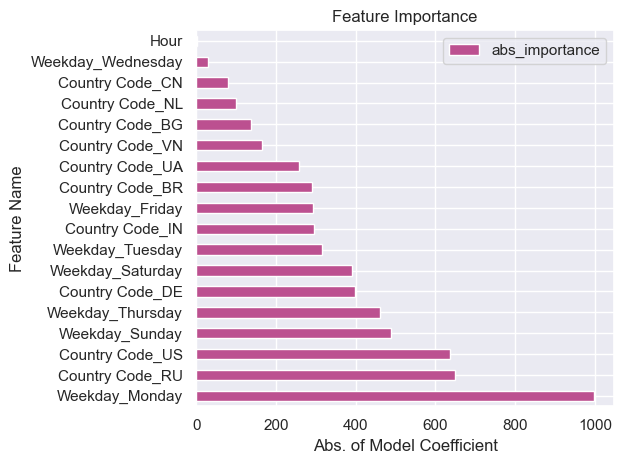

In [133]:
plt.figure(figsize=(12, 8))
imp_df.plot.barh(legend=True, color='#bc5090')
plt.title('Feature Importance')
plt.xlabel('Abs. of Model Coefficient')
plt.ylabel('Feature Name')
plt.tight_layout()
#plt.savefig('feature_importance.png', dpi=300, transparent=True)

* Find variable vector corresponding to the most important feature

In [134]:
X = pd.DataFrame(x)

In [135]:
X.columns = features

In [136]:
monday = X["Weekday_Monday"]

In [137]:
monday

0      0.010444
1      0.012308
2      0.015936
3      0.017986
4      0.039711
         ...   
235    0.109057
236    0.138241
237    0.110701
238    0.092800
239    0.125000
Name: Weekday_Monday, Length: 240, dtype: float64

* Get actual target values

In [138]:
y_true = final_df["Attack_Frequency"]

In [139]:
y_true

0      383
1      325
2      251
3      278
4      277
      ... 
235    541
236    557
237    542
238    625
239    528
Name: Attack_Frequency, Length: 240, dtype: int64

In order to plot scatterplot 2D: 
* We need to get the prediction of the model only with the use of one variable coefficient ( the most important one);
    * Find coef for the most important feature ( a)
    * Get intercept of the model ( b )
    * As vector x we use monday variable
    * y_pred  = a * monday + b ( monday = mean N of attacks per day ) The regression line interpreted as Y = a.X + b

In [140]:
a = model.coef_[most_important_var_idx] 

In [141]:
a

997.5557135481753

In [142]:
b = model.intercept_

In [143]:
b

449.3487101061997

In [144]:
y_pred_new = a * monday + b

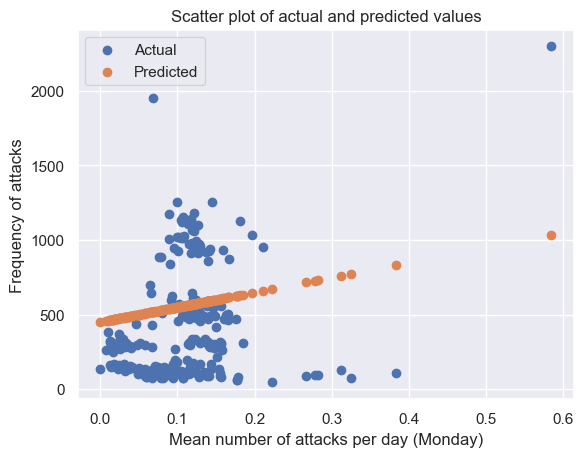

In [145]:
plt.scatter(monday, y_true, label='Actual')
plt.scatter(monday, y_pred_new, label='Predicted')
plt.title('Scatter plot of actual and predicted values')
plt.xlabel('Mean number of attacks per day (Monday)')
plt.ylabel('Frequency of attacks')
plt.legend()
plt.show()
#plt.savefig('Attacks per day (Monday).png', dpi=300, transparent=True)